In [1]:
from urllib.request import urlopen
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
import re
import os
from ekonlpy.tag import Mecab
import math
import pandas_profiling
import matplotlib.pyplot as plt

In [33]:
perfect_crp = pd.read_csv(r'C:\Users\PC\OneDrive\Data Science\Weak-supervision\생존편향 제거\완료된 데이터\최종본\Lv.1_perfect_crp.csv', encoding='euc-kr', index_col = 0)
perfect_crp

,crp_nm,crp_cd,연도,rpt_nm,rcp_no,rcp_dt,rmk,url,str,str_tokens
0,CJ,1040,2018,사업보고서 (2018.12),20190329004141,20190329,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...
1,CJ,1040,2017,사업보고서 (2017.12),20180330003087,20180330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...
2,CJ,1040,2016,사업보고서 (2016.12),20170331004642,20170331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
3,CJ,1040,2015,사업보고서 (2015.12),20160330003575,20160330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
4,CJ,1040,2014,사업보고서 (2014.12),20150331004081,20150331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
...,...,...,...,...,...,...,...,...,...,...
1065,휴켐스,69260,2013,사업보고서 (2013.12),20140331003099,20140331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1066,휴켐스,69260,2012,사업보고서 (2012.12),20130401000720,20130401,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1067,휴켐스,69260,2011,사업보고서 (2011.12),20120330000492,20120330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1068,휴켐스,69260,2010,[첨부추가]사업보고서 (2010.12),20110331002418,20110331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...


In [34]:
crp_list = list(perfect_crp.crp_nm.unique())
crp_list

['CJ',
 'CJ대한통운',
 'CJ제일제당',
 'GS',
 'HDC',
 'KB금융',
 '케이씨씨',
 '케이티',
 '케이티앤지',
 'LF',
 'LG디스플레이',
 'LG상사',
 'LG생활건강',
 'LG전자',
 'LG화학',
 'NAVER',
 'NH투자증권',
 'OCI',
 '포스코',
 'S&T모티브',
 'S-Oil',
 'SKC',
 'SK네트웍스',
 'SK디스커버리',
 'SK이노베이션',
 'SK텔레콤',
 '강원랜드',
 '고려아연',
 '고려제강',
 '금호석유화학',
 '기아자동차',
 '기업은행',
 '남양유업',
 '남해화학',
 '넥센타이어',
 '녹십자',
 '농심',
 '대교',
 '대덕전자',
 '대림산업',
 '대상',
 '대우건설',
 '대웅제약',
 '대한유화',
 '대한항공',
 '동국제강',
 '동아쏘시오홀딩스',
 '두산',
 '두산인프라코어',
 '두산중공업',
 '롯데쇼핑',
 '롯데정밀화학',
 '롯데지주',
 '롯데칠성음료',
 '롯데케미칼',
 '롯데푸드',
 '미래에셋대우',
 '부광약품',
 '빙그레',
 '삼성SDI',
 '삼성엔지니어링',
 '삼성전기',
 '삼성전자',
 '삼성중공업',
 '삼성화재해상보험',
 '삼양홀딩스',
 '세방전지',
 '세아베스틸',
 '신세계',
 '신한지주',
 '쌍용양회공업',
 '아모레퍼시픽그룹',
 '아모레퍼시픽',
 '에스원',
 '엔씨소프트',
 '영풍',
 '오뚜기',
 '오리온홀딩스',
 '유니드',
 '유한양행',
 '일양약품',
 '제일기획',
 '코웨이',
 '태광산업',
 '포스코인터내셔널',
 '하나금융지주',
 '한국가스공사',
 '한국금융지주',
 '한국단자공업',
 '한국전력공사',
 '한국조선해양',
 '한국테크놀로지그룹',
 '한섬',
 '한온시스템',
 '한화',
 '한화솔루션',
 '한화에어로스페이스',
 '현대건설',
 '현대모비스',
 '현대미포조선',
 '현대백화점',
 '현대엘리베이터',
 '현대제철',
 '현대

In [35]:
df = perfect_crp.copy()
df = df.loc[:, ['crp_nm', '연도', 'rpt_nm', 'url', 'str', 'str_tokens']]    # 쓸모없는 부분 제거
df['Fog_word3'] = np.nan   # 새로운 column 생성
df['Fog_word5'] = np.nan
df['Fog_word7'] = np.nan
df['Fog_word10'] = np.nan
df['Flesch'] = np.nan
df['Length'] = np.nan
df

,crp_nm,연도,rpt_nm,url,str,str_tokens,Fog_word3,Fog_word5,Fog_word7,Fog_word10,Flesch,Length
0,CJ,2018,사업보고서 (2018.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CJ,2017,사업보고서 (2017.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...,NaN,NaN,NaN,NaN,NaN,NaN
2,CJ,2016,사업보고서 (2016.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,NaN,NaN,NaN,NaN,NaN,NaN
3,CJ,2015,사업보고서 (2015.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,NaN,NaN,NaN,NaN,NaN,NaN
4,CJ,2014,사업보고서 (2014.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,휴켐스,2013,사업보고서 (2013.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,NaN,NaN,NaN,NaN,NaN,NaN
1066,휴켐스,2012,사업보고서 (2012.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,NaN,NaN,NaN,NaN,NaN,NaN
1067,휴켐스,2011,사업보고서 (2011.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,NaN,NaN,NaN,NaN,NaN,NaN
1068,휴켐스,2010,[첨부추가]사업보고서 (2010.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...,NaN,NaN,NaN,NaN,NaN,NaN


Fog index 구하기
- 단어개수, 문장개수, complex word 개수 (3,5,7,10음절) 구해야 함

In [36]:
df.str_tokens[0].split(" ")

['IV',
 '이사',
 '의',
 '경영진단',
 '및',
 '분석',
 '의견',
 '예측',
 '정보',
 '에',
 '대한',
 '주',
 '의',
 '사항',
 '보',
 '자료',
 '는',
 '회사',
 '의',
 '재무',
 '상황',
 '영업',
 '실적',
 '및',
 '사업',
 '에',
 '관련',
 '한',
 '추정',
 '계획',
 '예상',
 '등',
 '예측',
 '정보',
 '를',
 '포함',
 '하',
 '고',
 '있',
 '이',
 '는',
 '과거',
 '가',
 '아니',
 '미래',
 '의',
 '예측',
 '관계',
 '되',
 '것',
 '으로',
 '향후',
 '예상',
 '되',
 '는',
 '회사',
 '의',
 '경영',
 '현황',
 '및',
 '재무',
 '실적',
 '을',
 '의미',
 '하',
 '며',
 '표현',
 '상',
 '으로',
 '는',
 '예상',
 '전망',
 '계획',
 '기대',
 '예정',
 '등',
 '과',
 '같',
 '은',
 '단어',
 '를',
 '포함',
 '합니다',
 '보',
 '자료',
 '에',
 '직접',
 '적',
 '으로',
 '표현',
 '되',
 '거나',
 '또는',
 '함축',
 '되',
 '어',
 '있',
 '는',
 '미래',
 '에',
 '관하',
 '제반',
 '사항',
 '은',
 '이미',
 '알려진',
 '위험',
 '과',
 '알려',
 '지지',
 '않',
 '은',
 '위험',
 '을',
 '내포',
 '하',
 '고',
 '있',
 '으며',
 '불확실성',
 '등',
 '여러',
 '요인',
 '에',
 '의하',
 '여',
 '실제',
 '결과',
 '실적',
 '과',
 '다르',
 '수',
 '있',
 '고',
 '그러',
 '한',
 '차이',
 '는',
 '중요',
 '하',
 '수',
 '있',
 '회사',
 '는',
 '보',
 '자료',
 '에',
 '직접',
 '적',
 '으로',
 '표현',
 '되',


In [37]:
p = re.compile(" {20,70}", re.MULTILINE)    
print(p.findall(df.str[100]))

[]


In [7]:
def preprocessing(str_):
    doc = re.sub('(\n|\t)', '', str_)  # 개행문자 제거
    doc = re.sub(' {20,70}', '', doc)      # 긴 공백(30~70자리) 제거
    doc = re.sub('([Ⅰ-Ⅹ]+|[ⅰ-ⅹ]+)', '', doc)  # 로마숫자
    doc = re.sub('(&lt|&gt)', '', doc)     # <,>가 변형된 &lt,&gt 제거
    return doc

In [38]:
preprocessing(df.str_tokens[0]).split(".")

['IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회사 의 재무 상황 영업 실적 및 사업 에 관련 한 추정 계획 예상 등 예측 정보 를 포함 하 고 있 이 는 과거 가 아니 미래 의 예측 관계 되 것 으로 향후 예상 되 는 회사 의 경영 현황 및 재무 실적 을 의미 하 며 표현 상 으로 는 예상 전망 계획 기대 예정 등 과 같 은 단어 를 포함 합니다 보 자료 에 직접 적 으로 표현 되 거나 또는 함축 되 어 있 는 미래 에 관하 제반 사항 은 이미 알려진 위험 과 알려 지지 않 은 위험 을 내포 하 고 있 으며 불확실성 등 여러 요인 에 의하 여 실제 결과 실적 과 다르 수 있 고 그러 한 차이 는 중요 하 수 있 회사 는 보 자료 에 직접 적 으로 표현 되 거나 또는 함축 되 어 있 는 제반 정보 의 정확 성과 완전 함 에 대해 어떠 한 주장 보장 도 제공 하 지 않 으며 보 자료 에 포함 되 과거 혹은 미래 에 관하 서술 은 어떠 한 경우 에 도 회사 의 약속 주장 으로 간주 되 수 없 보 정보 는 회사 의 계획 추정 예상 에 기반 하 고 있 으며 향후 회사 가 처하 게 되 정치 경제 적 영업 환경 을 반영 하 고 있 으므로 회사 의 이러 한 추정 예상 은 영업 환경 및 외부 환경 에 따라 변경 되 수 있 으니 투자 판단 에 유의 하 시 기 바랍니다 추정 계획 예상 은 작성 일 현재 시점 의 사항 만 을 서술 하 므로 회사 는 추후 발생 하 수 있 는 미래 의 사건 또는 위험요인 에 대하 여 추가 적 인 정보 를 제공 하 의무 기재 한 사항 을 수정 하 는 정정 보고서 를 공시 하 의무 는 없 개요 CJ 주식회사 는 일 지주회사 전환 으로 투자 사업 의 분리 를 통하 경영 투명 성과 효율성 을 제고 하 는 기반 을 마련 하 였을 뿐 만 아니 라 자회사 들 은 고유 의 사업 에 만 전념 하 여 경영 실적 에 따라 평가 받 는 선진 적 기업지배구조 를 구축 하 였 회사 의 사업부문 은 식품 및 식품 서비스 생명 공학 물류 

In [39]:
df

,crp_nm,연도,rpt_nm,url,str,str_tokens,Fog_word3,Fog_word5,Fog_word7,Fog_word10,Flesch,Length
0,CJ,2018,사업보고서 (2018.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CJ,2017,사업보고서 (2017.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...,NaN,NaN,NaN,NaN,NaN,NaN
2,CJ,2016,사업보고서 (2016.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,NaN,NaN,NaN,NaN,NaN,NaN
3,CJ,2015,사업보고서 (2015.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,NaN,NaN,NaN,NaN,NaN,NaN
4,CJ,2014,사업보고서 (2014.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,휴켐스,2013,사업보고서 (2013.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,NaN,NaN,NaN,NaN,NaN,NaN
1066,휴켐스,2012,사업보고서 (2012.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,NaN,NaN,NaN,NaN,NaN,NaN
1067,휴켐스,2011,사업보고서 (2011.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,NaN,NaN,NaN,NaN,NaN,NaN
1068,휴켐스,2010,[첨부추가]사업보고서 (2010.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
for i in range(df.shape[0]):
    print("Process : {} | Total : {}".format(i+1, df.shape[0]), end='\r')
    data_ = df.str_tokens[i]   # 한국어에 맞게 토큰화된 data
    data_str = df.str[i]       # raw data 
    total_data = preprocessing(data_)          # 한국어에 맞게 토큰화된 data
    total_data_str = preprocessing(data_str)   # raw data
    
    letter_num = 0        # 글자 수
    word3_num = 0         # 3음절 이상 단어 수
    word5_num = 0         # 5음절 이상 단어 수
    word7_num = 0         # 7음절 이상 단어 수
    word10_num = 0         # 10음절 이상 단어 수
    word_num = 0           # 단어 수
    sentence_num = 0       # 문장 수
    
    # 단어수 집계
    for word in range(0, len(total_data.split(" "))):  # 단어수는 빈칸(“ ”)으로 구분 
        # 글자수 또는 음절수는 단어를 구성하는 요소로 판단 
        letter_num = letter_num + len(total_data.split(" ")[word]) 
        word_num = word_num + 1 
        if len(total_data.split(" ")[word]) > 2: 
            word3_num = word3_num + 1 
        if len(total_data.split(" ")[word]) > 4: 
            word5_num = word5_num + 1 
        if len(total_data.split(" ")[word]) > 6: 
            word7_num = word7_num + 1 
        if len(total_data.split(" ")[word]) > 9: 
            word10_num = word10_num + 1 
    
    # 문장수 집계
    for sent in range(0, len(total_data_str.split("."))):   # 문장수는 마침표로 구분 
        split_length = len(total_data_str.split(".")[sent]) 
        if split_length == 0: 
            sentence_num = sentence_num 
        elif total_data_str.split(".")[sent][split_length - 1].isdigit():   # 마침표 앞에 숫자면 제외, 예 : 10.31%, 17.08.11 등 
            sentence_num = sentence_num 
        else: 
            sentence_num = sentence_num + 1 
            # 위의 경우를 제외하고, 문장수 집계
    AWL = letter_num/word_num        # Flesch 구성요소 : 평균 단어 길이 
    ASL = word_num/sentence_num      # Flesch 구성요소 : 평균 문장 길이 
    Flesch = 206.835 - 84.6 * AWL - 1.015 * ASL    # Flesch 측정
    Fog_word3 = (ASL + 100*(word3_num/word_num)) * 0.4
    Fog_word5 = (ASL + 100*(word5_num/word_num)) * 0.4
    Fog_word7 = (ASL + 100*(word7_num/word_num)) * 0.4
    Fog_word10 = (ASL + 100*(word10_num/word_num)) * 0.4
    Length = math.log(word_num)
    df.iloc[i,6] = Fog_word3
    df.iloc[i,7] = Fog_word5
    df.iloc[i,8] = Fog_word7
    df.iloc[i,9] = Fog_word10
    df.iloc[i,10] = Flesch
    df.iloc[i,11] = Length

In [45]:
total_data

'V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업년도 의 회계 및 업무 에 관하 여 이사 의 경영진단 에 관하 의견 을 아래 와 같이 보 고 합니다 개 요 회사 의 경영 에 대한 전반 적 인 사항 을 파악 하 기 위하 여 장부 관계 서류 를 열람 하 고 재무제표 및 부속 명세서 에 대하 여도 면밀히 검토 하 였 경영 활동 에 중대 한 영향 을 미치 수 있 는 사항 에 대하 여 는 그 내용 을 면밀히 검토 하 는 등 적정 한 방법 으로 회사 경영 에 대한 내용 을 진단 하 였 지난해 글로벌 금융위기 로 인하 세계 경제 의 침체 로 분기 에 는 어렵 을 겪 었 만 분기 이후 화학 산업 의 빠르 회복세 암모니아 를 비롯 한 원재료 가격 의 하락 으로 창사 이래 최대 실적 을 달성 하 였 영업 실적 을 살펴보 면 매출액 은 전기 대비 증가 하 이 며 영업이익 은 전기 대비 상승 하 을 시현 하 였 도 에 는 유가 의 상승 으로 인하 원재료 가격 의 상승세 환율 의 하락세 로 이익 성장 에 악영향 을 미치 것 으로 예상 되 지만 적극적 인 신규 거래선 개척 기존 거래선 에 대한 밀착 영업 등 의 노력 으로 당기 에 버금가 는 실적 을 달성 하 도록 최선 을 다 하 겠 중장기 적 으로 는 기존 사업 의 수익 기반 을 보다 강화 하 고 지속 적 인 사업다각화 를 통하 여 어떤 환경 에서 도 생존 하 수 있 는 글로벌 정밀 화학 기업 으로 위상 을 확립 해 나가 도록 총력 을 기울이 겠 재무 상태 및 영업 실적 가 재무 상태 단위 재무 상태 를 살펴보 면 자산총계 는 전기 대비 증가 하 부채총계 는 증가 하 이 었 자산 증가 는 MNB 공장 의 건설 에 따르 신규 시설 및 매출 증가 에 따르 매출채권 증가 가 주요 원인 이 며 부채 증가 는 생산량 증가 에 따르 원재료 매입채무 및 운영 신규 시설자금 확보 를 위하 단기 차입금 증가 가 주요 원인 입니다 당기 의 유동비율 은 부채비율 은 로써 건실 한 재무 안정성 을 계속 유지 하 고 있 

In [43]:
total_data_str

'V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2009년 1월 1일부터 2009년 12월 31일까지 제 8기 사업년도의 회계및 업무에 관하여 이사의 경영진단에 관한 의견을 아래와 같이 보고합니다.1. 개 요회사의 경영에 대한 전반적인 사항을 파악하기 위하여 장부와 관계서류를 열람하고 재무제표 및 부속명세서에 대하여도 면밀히 검토하였습니다. 경영활동에 중대한 영향을 미칠 수 있는 사항에 대하여는 그 내용을 면밀히 검토하는 등 적정한 방법으로 회사경영에 대한 내용을 진단하였습니다.지난해 글로벌 금융위기로 인한 세계경제의 침체로 1/4분기에는 어려움을 겪었습니다만, 2/4분기 이후 화학산업의 빠른 회복세와 암모니아를 비롯한 원재료가격의 하락으로 창사이래 최대실적을 달성하였습니다. 영업실적을 살펴보면 매출액은 전기 대비 9% 증가한 4,522억원이며 영업이익은 전기 대비 79% 상승한 828억원을 시현하였습니다. 2010년도에는 유가의 상승으로 인한 원재료가격의 상승세와 환율의 하락세로 이익 성장에 악영향을 미칠 것으로 예상되지만, 적극적인 신규거래선 개척과 기존거래선에 대한 밀착 영업 등의 노력으로 당기에 버금가는 실적을 달성하도록 최선을 다하겠습니다. 중장기적으로는 기존사업의 수익기반을 보다 강화하고, 지속적인 사업다각화를 통하여 어떤 환경에서도 생존할 수 있는 글로벌 정밀화학 기업으로 위상을 확립해 나가도록 총력을 기울이겠습니다.2. 재무상태 및 영업실적가. 재무상태(단위:백만원)\r재무상태를 살펴보면 자산총계는 전기 대비 33% 증가한 4,130억원, 부채총계는 28% 증가한 1,382억원이었습니다. 자산 증가는 MNB공장의 건설에 따른 신규시설 및 매출증가에 따른 매출채권 증가가 주요 원인이며, 부채 증가는 생산량 증가에 따른 원재료 매입채무 및 운영, 신규시설 자금 확보를 위한 단기 차입금 증가가 주요 원인입니다.당기의 유동비율은 196%, 부채비율은 50%로써 건실한 재무안정성을 계속 유지하고 있습니다. 세부내역은 (. 재무에 관한 사항)을 참조하시

In [47]:
df

,crp_nm,연도,rpt_nm,url,str,str_tokens,Fog_word3,Fog_word5,Fog_word7,Fog_word10,Flesch,Length
0,CJ,2018,사업보고서 (2018.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...,16.685044,12.121343,11.550614,11.461171,25.052485,9.840707
1,CJ,2017,사업보고서 (2017.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...,16.405713,11.729238,11.109527,10.994959,24.754222,9.639652
2,CJ,2016,사업보고서 (2016.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,17.007217,12.132468,11.406015,11.240684,22.403610,8.985195
3,CJ,2015,사업보고서 (2015.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,16.402544,11.570329,10.869613,10.701259,23.828298,9.081484
4,CJ,2014,사업보고서 (2014.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,15.856127,11.132356,10.483598,10.351819,25.328600,8.973605
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,휴켐스,2013,사업보고서 (2013.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,16.481283,12.795009,12.363636,12.363636,29.485802,6.927558
1066,휴켐스,2012,사업보고서 (2012.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,17.042500,12.799527,12.255556,12.255556,27.398903,7.005789
1067,휴켐스,2011,사업보고서 (2011.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,14.932921,11.168215,10.736842,10.736842,33.945557,6.927558
1068,휴켐스,2010,[첨부추가]사업보고서 (2010.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...,14.156029,9.779829,9.472727,9.472727,36.006400,6.255750


In [48]:
df.Fog_word3.describe()

count    1070.000000
mean       16.292705
std         2.169421
min        11.123486
25%        14.806713
50%        16.145158
75%        17.623689
max        24.713876
Name: Fog_word3, dtype: float64

In [23]:
# 맨 처음 '이사의' 시작하기 전에 str[0:3] 지우고 싶은데 어떻게 할까?
total_data.replace(total_data[:3], '')
total_data

"V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상·예측한 활동, 사건 또는 현상은 당해 공시서류 작성시점의 사건 및 재무성과에 대하여 회사의 견해를 반영한 것입니다. 동 예측정보는 미래 사업환경과 관련된 다양한 가정에 기초하고 있으며, 동 가정들은 결과적으로 부정확한 것으로 판명될 수도 있습니다. 또한, 이러한 가정들에는 예측정보에서 기재한 예상치와 실제 결과 간에 중요한 차이를 초래할 수 있는 위험, 불확실성 및 기타 요인을 포함하고 있습니다. 이러한 중요한 차이를 초래할 수 있는 요인에는 회사 내부경영과 관련된 요인과 외부환경에 관한 요인이 포함되어 있으며, 이에 한하지 않습니다.당사는 동 예측정보 작성시점이후에 발생하는 위험 또는 불확실성을 반영하기 위하여 예측정보에 기재한 사항을 수정하는 정정보고서를 공시할 의무는 없습니다.결론적으로, 동 사업보고서상에 회사가 예상한 결과 또는 사항이 실현되거나 회사가 당초에 예상한 영향이 발생한다는 확신을 제공할 수 없습니다. 동 보고서에 기재된 예측정보는동 보고서작성시점을 기준으로 작성한 것이며, 회사가 이러한 위험요인이나 예측정보를 업데이트할 예정이 없음을 유의하시기 바랍니다.2. 개요지난해, 우리경제는 메르스 사태의 여파와 높은 가계부채 부담으로 성장세 둔화가 이어지고 미국 금리인상 및 중국시장의 불확실성과 경제불안으로 금융시장의 변동성은 크게 확대되는 모습이었습니다. 이러한 환경하에서도 KB금융그룹은 고객 신뢰회복과 미래를 위한 준비에 묵묵히 정진하는 한 해를 보냈습니다.작년 한해 KB금융그룹은 KB손해보험을 한 가족으로 맞이하여 고객에 대한 금융서비스 영역을 확대하였으며 나라사랑카드 사업자 선정, 새로운 고객가치 제공을 위한 복합점포 개설 등과 같이 계열사간 협업을 통한 시너지 추진에도 성과를 내었습니다.2015년 영업실적에 대해 말씀드리면, 부동산 경기회복에 따른 대출채권 증가의 영향으로 그룹총자산은 전년대비 20조 709십억원 증가한 329조

In [49]:
df.to_csv(r'C:\Users\PC\OneDrive\Data Science\Weak-supervision\생존편향 제거\완료된 데이터\최종본\Fog df_token.csv', encoding='euc-kr')

In [61]:
list(df.Fog_word3)

[6.64386676727189,
 6.579065507313877,
 6.970027968471905,
 6.626181632700377,
 6.428649353432381,
 7.3178626865576355,
 6.936802094936585,
 6.895722427014082,
 9.164411027568923,
 8.320526532291238,
 7.443490816680144,
 7.432856933808108,
 6.494193548387097,
 6.842229965156794,
 6.339761279475315,
 5.952443236093762,
 8.192436808846763,
 8.389300411522633,
 8.883115501519757,
 7.705192224622031,
 6.566553672316385,
 6.592036661407858,
 6.4929234031274845,
 7.552903828197947,
 10.03505517211061,
 9.466065209769779,
 9.35502429543246,
 8.781418255632092,
 8.109649490294652,
 8.170456881248247,
 5.528468672558231,
 5.945119194922278,
 6.247834556896607,
 6.358766846143926,
 6.686287223592419,
 5.5546139359698685,
 5.664477611940299,
 5.664477611940299,
 5.366024204392649,
 5.000771055753263,
 6.8572033353847,
 7.813653560042508,
 7.1127759681505625,
 7.166075588305205,
 7.0160317460317465,
 7.225494083017963,
 7.508248170369882,
 8.155932203389831,
 6.9727756114852895,
 7.143605706874189

In [31]:
# fog만 떼서 describe해보자 - 이상치 점검(winsorization으로 해결 가능한 정도인지 - 가능하지 않은 정도...)
df_profile_new = df[['crp_nm', '연도', 'rpt_nm', 'Fog_word3', 'Fog_word5', 'Fog_word7', 'Fog_word10', 'Flesch', 'Length']]
df_profile_new

,crp_nm,연도,rpt_nm,Fog_word3,Fog_word5,Fog_word7,Fog_word10,Flesch,Length
0,CJ,2018,사업보고서 (2018.12),35.909964,19.318423,11.116639,7.391695,-146.294380,9.252154
1,CJ,2017,사업보고서 (2017.12),35.459492,18.430687,10.964141,7.389635,-140.870485,9.084550
2,CJ,2016,사업보고서 (2016.12),35.474376,18.645978,11.647449,7.833124,-139.778309,8.468213
3,CJ,2015,사업보고서 (2015.12),35.258163,18.249747,11.080658,7.400474,-137.078152,8.561784
4,CJ,2014,사업보고서 (2014.12),35.017877,18.011277,10.951451,7.229927,-137.616837,8.454679
...,...,...,...,...,...,...,...,...,...
1065,휴켐스,2013,사업보고서 (2013.12),35.645022,18.716450,10.359307,7.216450,-124.013528,6.327937
1066,휴켐스,2012,사업보고서 (2012.12),36.229630,18.721212,10.909764,7.340741,-135.067045,6.386879
1067,휴켐스,2011,사업보고서 (2011.12),34.924871,17.456065,9.042518,6.404372,-120.913242,6.329721
1068,휴켐스,2010,[첨부추가]사업보고서 (2010.12),33.891929,15.938134,8.149355,6.169157,-113.435407,5.713733


<Figure size 720x720 with 0 Axes>

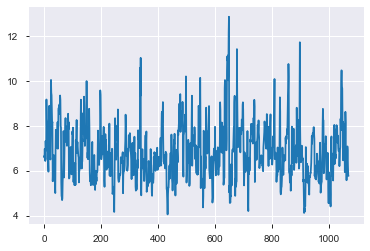

<Figure size 720x720 with 0 Axes>

In [65]:
plt.plot(df_profile_new.Fog_word3)
plt.figure(figsize=(10,10))

In [64]:
pr_new = df_profile_new.profile_report()
pr_new

In [66]:
pr_new.to_file(output_file="your_report.html")

In [78]:
df_profile_new.to_csv(r'C:\Users\PC\OneDrive\Data Science\Weak-supervision\생존편향 제거\완료된 데이터\최종본\Fog df_temp.csv', encoding='euc-kr')

### 개별 코드

In [225]:
# preprocessing의 결과값으로 나온 'temp_sent' list의 length가 각 document별 문장의 개수
temp_sent = preprocessing(df.str[0])
sentence_num = len(temp_sent)
temp_sent

[" 이사의 경영진단 및 분석의 예측정보에 대한 주의사항본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 추정, 계획, 예상 등 '예측정보'를 포함하고 있습니다",
 " 이는 과거가 아닌 미래의 예측과 관계된 것으로 향후 예상되는 회사의 경영현황 및 재무실적을 의미하며, 표현상으로는 '예상', '전망', '계획', '기대', '예정' 등과 같은 단어를 포함합니다",
 '본 자료에 직접적으로 표현되거나 또는 함축되어 있는 미래에 관한 제반 사항은 이미알려진 위험과 알려지지 않은 위험을 내포하고 있으며 불확실성 등 여러 요인에 의하여 실제 결과나 실적과 다를 수 있고, 그러한 차이는 중요할 수 있습니다',
 '회사는 본 자료에 직접적으로 표현되거나 또는 함축되어 있는 제반 정보의 정확성과 완전함에 대해 어떠한 주장이나 보장도 제공하지 않으며, 본 자료에 포함된 과거 혹은 미래에 관한 서술은 어떠한 경우에도 회사의 약속이나 주장으로 간주될 수 없습니다',
 ' 본 정보는 회사의 계획, 추정, 예상에 기반하고 있으며 향후 회사가 처하게 될 정치 경제적 영업환경을 반영하고 있으므로 회사의 이러한 추정과 예상은 영업환경 및 외부환경에 따라 변경될 수 있으니 투자판단에 유의하시기 바랍니다',
 '추정, 계획, 예상은 작성일 현재 시점의 사항만을 서술하므로 회사는 추후 발생할 수 있는 미래의 사건 또는 위험요인에 대하여 추가적인 정보를 제공할 의무와 기재한 사항을 수정하는 정정보고서를 공시할 의무는 없습니다',
 ' 개요CJ주식회사는지주회사 전환으로 투자와 사업의 분리를 통해 경영 투명성과 효율성을 제고하는 기반을 마련하였을 뿐만 아니라 자회사들은 고유의 사업에만 전념하여 경영 실적에 따라 평가 받는 선진적 기업지배구조를 구축하였습니다',
 ' 회사의 사업부문은 식품 및 식품서비스, 생명공학, 물류 및 신유통, 엔터테인먼트 및 미디어, 시너지 및 인프라 부문으로 구분하고 있습니다',
 '및 식품서비스 부문은 핵심제품의 시장 지위를 강화하는 한편 글로벌 영토 확장 및 획

In [226]:
# full text로 다시 합치기
temp = '.'.join(temp_sent)
temp = temp[1:]
temp

'이사의 경영진단 및 분석의 예측정보에 대한 주의사항본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 추정, 계획, 예상 등 \'예측정보\'를 포함하고 있습니다. 이는 과거가 아닌 미래의 예측과 관계된 것으로 향후 예상되는 회사의 경영현황 및 재무실적을 의미하며, 표현상으로는 \'예상\', \'전망\', \'계획\', \'기대\', \'예정\' 등과 같은 단어를 포함합니다.본 자료에 직접적으로 표현되거나 또는 함축되어 있는 미래에 관한 제반 사항은 이미알려진 위험과 알려지지 않은 위험을 내포하고 있으며 불확실성 등 여러 요인에 의하여 실제 결과나 실적과 다를 수 있고, 그러한 차이는 중요할 수 있습니다.회사는 본 자료에 직접적으로 표현되거나 또는 함축되어 있는 제반 정보의 정확성과 완전함에 대해 어떠한 주장이나 보장도 제공하지 않으며, 본 자료에 포함된 과거 혹은 미래에 관한 서술은 어떠한 경우에도 회사의 약속이나 주장으로 간주될 수 없습니다. 본 정보는 회사의 계획, 추정, 예상에 기반하고 있으며 향후 회사가 처하게 될 정치 경제적 영업환경을 반영하고 있으므로 회사의 이러한 추정과 예상은 영업환경 및 외부환경에 따라 변경될 수 있으니 투자판단에 유의하시기 바랍니다.추정, 계획, 예상은 작성일 현재 시점의 사항만을 서술하므로 회사는 추후 발생할 수 있는 미래의 사건 또는 위험요인에 대하여 추가적인 정보를 제공할 의무와 기재한 사항을 수정하는 정정보고서를 공시할 의무는 없습니다. 개요CJ주식회사는지주회사 전환으로 투자와 사업의 분리를 통해 경영 투명성과 효율성을 제고하는 기반을 마련하였을 뿐만 아니라 자회사들은 고유의 사업에만 전념하여 경영 실적에 따라 평가 받는 선진적 기업지배구조를 구축하였습니다. 회사의 사업부문은 식품 및 식품서비스, 생명공학, 물류 및 신유통, 엔터테인먼트 및 미디어, 시너지 및 인프라 부문으로 구분하고 있습니다.및 식품서비스 부문은 핵심제품의 시장 지위를 강화하는 한편 글로벌 영토 확장 및 획기적 성장을 위한 비상을 시작하였습니다.

In [227]:
# temp.split(' ')의 결과값으로 나온 list의 length가 각 document별 단어의 개수
temp_word = temp.split(' ')
word_num = len(temp_word)
temp_word

['이사의',
 '경영진단',
 '및',
 '분석의',
 '예측정보에',
 '대한',
 '주의사항본',
 '자료는',
 '회사의',
 '재무상황,',
 '영업실적',
 '및',
 '사업에',
 '관련한',
 '추정,',
 '계획,',
 '예상',
 '등',
 "'예측정보'를",
 '포함하고',
 '있습니다.',
 '이는',
 '과거가',
 '아닌',
 '미래의',
 '예측과',
 '관계된',
 '것으로',
 '향후',
 '예상되는',
 '회사의',
 '경영현황',
 '및',
 '재무실적을',
 '의미하며,',
 '표현상으로는',
 "'예상',",
 "'전망',",
 "'계획',",
 "'기대',",
 "'예정'",
 '등과',
 '같은',
 '단어를',
 '포함합니다.본',
 '자료에',
 '직접적으로',
 '표현되거나',
 '또는',
 '함축되어',
 '있는',
 '미래에',
 '관한',
 '제반',
 '사항은',
 '이미알려진',
 '위험과',
 '알려지지',
 '않은',
 '위험을',
 '내포하고',
 '있으며',
 '불확실성',
 '등',
 '여러',
 '요인에',
 '의하여',
 '실제',
 '결과나',
 '실적과',
 '다를',
 '수',
 '있고,',
 '그러한',
 '차이는',
 '중요할',
 '수',
 '있습니다.회사는',
 '본',
 '자료에',
 '직접적으로',
 '표현되거나',
 '또는',
 '함축되어',
 '있는',
 '제반',
 '정보의',
 '정확성과',
 '완전함에',
 '대해',
 '어떠한',
 '주장이나',
 '보장도',
 '제공하지',
 '않으며,',
 '본',
 '자료에',
 '포함된',
 '과거',
 '혹은',
 '미래에',
 '관한',
 '서술은',
 '어떠한',
 '경우에도',
 '회사의',
 '약속이나',
 '주장으로',
 '간주될',
 '수',
 '없습니다.',
 '본',
 '정보는',
 '회사의',
 '계획,',
 '추정,',
 '예상에',
 '기반하고',
 '있으며',
 '향후',
 '회사가',
 '처하게',
 

In [228]:
# temp.split(' ')의 결과값으로 나온 list에서 3,5,7,10음절 이상의 단어(complex word)개수를 각각 구할 수 있음.
for i in temp_word:
    if len(i) > 2:
        word3_num = word3_num + 1
    if len(i) > 4:
        word5_num = word5_num + 1
    if len(i) > 6:
        word7_num = word7_num + 1
    if len(i) > 9:
        word10_num = word10_num + 1

In [229]:
# str인 temp에서 모든 기호, 특수문자들을 제거하면 글자 수가 나옴
temp_str = temp
temp_str = re.sub('[-=+,.#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',temp_str)    # 모든 기호, 특수문자들 제거
temp_str

'이사의 경영진단 및 분석의 예측정보에 대한 주의사항본 자료는 회사의 재무상황 영업실적 및 사업에 관련한 추정 계획 예상 등 예측정보를 포함하고 있습니다 이는 과거가 아닌 미래의 예측과 관계된 것으로 향후 예상되는 회사의 경영현황 및 재무실적을 의미하며 표현상으로는 예상 전망 계획 기대 예정 등과 같은 단어를 포함합니다본 자료에 직접적으로 표현되거나 또는 함축되어 있는 미래에 관한 제반 사항은 이미알려진 위험과 알려지지 않은 위험을 내포하고 있으며 불확실성 등 여러 요인에 의하여 실제 결과나 실적과 다를 수 있고 그러한 차이는 중요할 수 있습니다회사는 본 자료에 직접적으로 표현되거나 또는 함축되어 있는 제반 정보의 정확성과 완전함에 대해 어떠한 주장이나 보장도 제공하지 않으며 본 자료에 포함된 과거 혹은 미래에 관한 서술은 어떠한 경우에도 회사의 약속이나 주장으로 간주될 수 없습니다 본 정보는 회사의 계획 추정 예상에 기반하고 있으며 향후 회사가 처하게 될 정치 경제적 영업환경을 반영하고 있으므로 회사의 이러한 추정과 예상은 영업환경 및 외부환경에 따라 변경될 수 있으니 투자판단에 유의하시기 바랍니다추정 계획 예상은 작성일 현재 시점의 사항만을 서술하므로 회사는 추후 발생할 수 있는 미래의 사건 또는 위험요인에 대하여 추가적인 정보를 제공할 의무와 기재한 사항을 수정하는 정정보고서를 공시할 의무는 없습니다 개요CJ주식회사는지주회사 전환으로 투자와 사업의 분리를 통해 경영 투명성과 효율성을 제고하는 기반을 마련하였을 뿐만 아니라 자회사들은 고유의 사업에만 전념하여 경영 실적에 따라 평가 받는 선진적 기업지배구조를 구축하였습니다 회사의 사업부문은 식품 및 식품서비스 생명공학 물류 및 신유통 엔터테인먼트 및 미디어 시너지 및 인프라 부문으로 구분하고 있습니다및 식품서비스 부문은 핵심제품의 시장 지위를 강화하는 한편 글로벌 영토 확장 및 획기적 성장을 위한 비상을 시작하였습니다 식품은 HMR시장의 선두주자 지위를 확고히 했을 뿐 아니라 미국 슈완스 인수로 글로벌 메이

In [260]:
str_mid = temp_str.split(' ')
str_final = ''.join(str_mid)
letter_num = len(str_final)  # 띄어쓰기 제외
# letter_num = len(temp_str)  # 띄어쓰기 포함

In [261]:
print(letter_num)
print(word3_num)
print(word5_num)
print(word7_num)
print(word10_num)
print(word_num)
print(sentence_num)

34511
6649
2827
1087
299
8989
626


In [268]:
AWL = letter_num/word_num        # Flesch 구성요소 : 평균 단어 길이 
ASL = word_num/sentence_num      # Flesch 구성요소 : 평균 문장 길이 
Flesch = 206.835 - 84.6 * AWL - 1.015 * ASL    # Flesch 측정
Fog = (ASL + word3_num/word_num) * 0.4
Length = math.log(word_num)
print('\r', 'AWL:', AWL, '\n', 'ASL:', ASL, '\n', 'Flesch:', Flesch, '\n', 'Fog:', Fog, '\n', 'Length:', Length)

 AWL: 3.839247969740794 
 ASL: 14.359424920127795 
 Flesch: -132.54019453400085 
 Fog: 6.039642701391868 
 Length: 9.103756886573398


In [8]:
def preprocessing(str_):
    doc = re.sub('[0-9]+', 'num', str_)     # 숫자 -> 'num'으로 변환
    # 확인용(해당부분만)
    # p = re.compile("num.?\.", re.MULTILINE)    
    # print(p.findall(doc))
    doc = re.sub('.?num.?\.', '', doc)     # 아무 숫자(문자) 0~1번 + 'num' + 아무 숫자(문자) 0~1번 이상 나올 때 --> '온점'까지 제거
    doc = re.sub('.?num.{0,5} ', '', doc)     # 아무 숫자(문자) 0~1번 + 'num' + 아무 숫자(문자) 0~5번 이상 나올 때 --> '공백'까지 제거
    doc = re.sub('num,num.{0,2}', '', doc)   # ex. num, num억원,백만,부채 (0~2자리) 등 제거
    doc = re.sub(' {20,70}', '', doc)      # 긴 공백(30~70자리) 제거
    doc = re.sub('([Ⅰ-Ⅹ]+|[ⅰ-ⅹ]+)', '', doc)  # 로마숫자
    doc = re.sub('(&lt|&gt)', '', doc)     # <,>가 변형된 &lt,&gt 제거
    doc = re.sub('num*','',doc)  # 끝까지 지워지지 않은 'num' 제거(처음에 한번에 제거하지 않은 이유는 문장을 나눌 때 소수점인지 날짜인지를 구분하기 위해)
    docu = doc.split(".")
    del docu[0]           # 맨 처음 공통으로 나오는 로마숫자 V 혹은 IV 제거
    return docu

In [9]:
letter_num = 0        # 글자 수
word3_num = 0         # 3음절 이상 단어 수
word5_num = 0         # 5음절 이상 단어 수
word7_num = 0         # 7음절 이상 단어 수
word10_num = 0         # 10음절 이상 단어 수
word_num = 0           # 단어 수
sentence_num = 0       # 문장 수

for i in range(df.shape[0]):
    print("Process : {} | Total : {}".format(i+1, df.shape[0]),end='\r')
    # preprocessing의 결과값으로 나온 'str_sent' list의 length가 각 document별 문장의 개수
    str_sent = preprocessing(df.str[i])   # return list
    sentence_num = len(str_sent)
    
    # full text로 다시 합치기
    str_ = '.'.join(str_sent)
    str_ = str_[1:]
    
    # str_.split(' ')의 결과값으로 나온 list의 length가 각 document별 단어의 개수
    str_word = str_.split(' ')
    word_num = len(str_word)
    
    # str_word에서 3,5,7,10음절 이상의 단어(complex word)개수를 각각 구할 수 있음.
    for n in str_word:
        if len(n) > 2:
            word3_num = word3_num + 1
        if len(n) > 4:
            word5_num = word5_num + 1
        if len(n) > 6:
            word7_num = word7_num + 1
        if len(n) > 9:
            word10_num = word10_num + 1
    
    # str_에서 모든 기호, 특수문자들을 제거하면 글자 수가 나옴
    str_ = re.sub('[-=+,.#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',str_)    # 모든 기호, 특수문자들 제거
    str_mid = str_.split(' ')
    str_final = ''.join(str_mid)
    letter_num = len(str_final)  # 띄어쓰기 제외
    
    # letter_num = len(temp_str)  # 띄어쓰기 포함
    AWL = letter_num/word_num        # Flesch 구성요소 : 평균 단어 길이 
    ASL = word_num/sentence_num      # Flesch 구성요소 : 평균 문장 길이 
    Flesch = 206.835 - 84.6 * AWL - 1.015 * ASL    # Flesch 측정
    Fog = (ASL + word3_num/word_num) * 0.4
    Length = math.log(word_num)
    df.iloc[i,6] = Fog
    df.iloc[i,7] = Flesch
    df.iloc[i,8] = Length
    df.iloc[i,9] = AWL
    df.iloc[i,10] = ASL

In [10]:
df

,crp_nm,연도,rpt_nm,url,str,str_tokens,Fog,Flesch,Length,AWL,ASL
0,CJ,2018,사업보고서 (2018.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...,6.039643,-132.540195,9.103757,3.839248,14.359425
1,CJ,2017,사업보고서 (2017.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...,6.592977,-125.785601,8.930230,3.753209,14.875984
2,CJ,2016,사업보고서 (2016.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,7.607159,-121.099473,8.299286,3.692862,15.288973
3,CJ,2015,사업보고서 (2015.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,7.348680,-120.884356,8.390723,3.702678,14.258900
4,CJ,2014,사업보고서 (2014.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...,7.545604,-122.259802,8.270269,3.727855,13.515571
...,...,...,...,...,...,...,...,...,...,...,...
1065,휴켐스,2013,사업보고서 (2013.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,653.680660,-112.968061,6.224558,3.578218,16.833333
1066,휴켐스,2012,사업보고서 (2012.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,616.529104,-123.154683,6.284134,3.699627,16.750000
1067,휴켐스,2011,사업보고서 (2011.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...,662.187149,-110.780532,6.210600,3.588353,13.833333
1068,휴켐스,2010,[첨부추가]사업보고서 (2010.12),http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...,1293.089101,-109.495365,5.537334,3.578740,13.368421


# 뭔가 이상하다.. Fog가 너무 낮음... 일단 데이터프레임에 담아보자

In [12]:
# fog만 떼서 describe해보자 - 이상치 점검(winsorization으로 해결 가능한 정도인지 - 가능하지 않은 정도...)
df_profile = df[['crp_nm', '연도', 'rpt_nm', 'Fog']]
df_profile

,crp_nm,연도,rpt_nm,Fog
0,CJ,2018,사업보고서 (2018.12),6.039643
1,CJ,2017,사업보고서 (2017.12),6.592977
2,CJ,2016,사업보고서 (2016.12),7.607159
3,CJ,2015,사업보고서 (2015.12),7.348680
4,CJ,2014,사업보고서 (2014.12),7.545604
...,...,...,...,...
1065,휴켐스,2013,사업보고서 (2013.12),653.680660
1066,휴켐스,2012,사업보고서 (2012.12),616.529104
1067,휴켐스,2011,사업보고서 (2011.12),662.187149
1068,휴켐스,2010,[첨부추가]사업보고서 (2010.12),1293.089101


<Figure size 1440x1440 with 0 Axes>

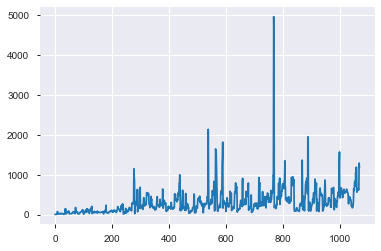

<Figure size 1440x1440 with 0 Axes>

In [21]:
plt.plot(df_profile.Fog)
plt.figure(figsize=(20,20))

In [15]:
pr = df_profile.profile_report()
pr

C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


"우리말 사업보고서 가독성" 논문의 참고 코드

In [ ]:
from docx 
import Document 
import xlsxwriter 
import os

savename = "D:\\Fiscal Year.xlsx" # 연도별 가독성 측정 결과 저장경로
workbook = xlsxwriter.Workbook(savename) 
worksheet = workbook.add_worksheet() 
row_w = 0

for root, directories, files in os.walk("D:\\Annual Report"):# 사업보고서 저장경로 
    # 가독성지수의 구성요소별 집계 시작점을 “0”으로 지정 
    for filename in files: 
        file_len = len(os.path.splitext(filename)[0]) # 파일명의 글자수 세기 
        if os.path.splitext(filename)[0][file_len-4:file_len] == "2015": # 회계연도(예시) 
            letter_num = 0 # 글자수 
            word3_num = 0 # 3음절이상 단어수 
            word5_num = 0 # 5음절이상 단어수 
            word7_num = 0 # 7음절이상 단어수
            word10_num = 0 # 10음절이상 단어수 
            word_num = 0 # 단어수 
            sentence_num = 0 # 문장수 
            document = Document(root + "\\" + filename)
            
            # 단락 내 각 구성요소 집계과정 
            for para in document.paragraphs: 
                for i in range(0, len(para.text.split(" "))): 
                # 단어수는 빈칸(“ ”)으로 구분 
                # 글자수 또는 음절수는 단어를 구성하는 요소로 판단함. 
                    letter_num = letter_num + len(para.text.split()[i]) 
                    word_num = word_num + 1 
                    if len(para.text.split(" ")[i]) > 2: 
                        word3_num = word3_num + 1 
                    if len(para.text.split(" ")[i]) > 4: 
                        word5_num = word5_num + 1 
                    if len(para.text.split(" ")[i]) > 6: 
                        word7_num = word7_num + 1 
                    if len(para.text.split(" ")[i]) > 9: 
                        word10_num = word10_num + 1 
                for i in range(0,len(para.text.split("."))): # 문장수는 마침표로 구분 
                    split_length = len(para.text.split(".")[i]) 
                    if split_length == 0: 
                        sentence_num = sentence_num 
                    elif para.text.split(".")[i][split_length - 1].isdigit(): 
                        sentence_num = sentence_num # 마침표 앞에 숫자면 제외, 예 : 10.31%, 17.08.11 등 
                    else: 
                        sentence_num = sentence_num + 1 
                        # 위의 경우를 제외하고, 문장수 집계
            # 엑셀 시트에 행단위로 출력 (제일 첫 번쨰 열에 회사명으로 시작) 
            worksheet.write(row_w, 0, os.path.splitext(filename)[0][0:file_len – 4]) 
            worksheet.write(row_w, 1, letter_num) # 글자수 
            worksheet.write(row_w, 2, word_num) # 단어수 
            worksheet.write(row_w, 3, word3_num) # 3음절이상 단어수 
            worksheet.write(row_w, 4, sentence_num) # 문장수 
            AWL = letter_num/word_num # Flesch 구성요소 : 평균 단어 길이 
            ASL = word_num/sentence_num # Flesch 구성요소 : 평균 문장 길이 
            flesch = 206.835 - 84.6 * AWL - 1.015 * ASL # Flesch 측정 
            worksheet.write(row_w, 5, AWL) # AWL 
            worksheet.write(row_w, 6, ASL) # ASL 
            worksheet.write(row_w, 7, flesch) # Flesch Index 
            worksheet.write(row_w, 8, word5_num) # 5음절이상 단어수 
            worksheet.write(row_w, 9, word7_num) # 7음절이상 단어수 
            worksheet.write(row_w, 10, word10_num) # 10음절이상 단어수
            print(os.path.splitext(filename)[0] + "is collected:", letter_num, word_num, word3_num, sentence_num, AWL, ASL, flesch, word5_num, word7_num, word10_num) # 프로그램 화면에 출력하여 결과 진행 확인가능 
            row_w = row_w + 1 # 다음 행으로 넘어가기
workbook.close() # 엑셀파일 워크시트 닫고 저장 
print("end") # 해당 회계연도 전부 수행시 “end” 출력